# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

Observações:
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [33]:
# Importar bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [34]:
# Importação da base de dados
df = pd.read_csv('advertising.csv')
df

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

In [35]:
# Visualização das informações de cada coluna através do comando 'info'
df.info()

# Todos dados são 'não-nulos'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


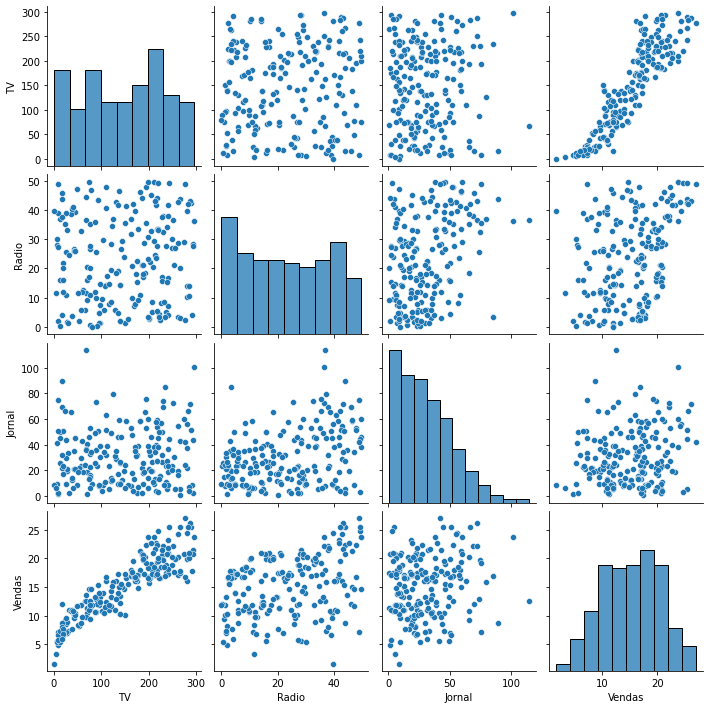

In [36]:
# Analizando a correlação entre as colunas de cada item
df.corr()

# Criação de um gráfico de distribuição das correlações
sns.pairplot(df)
plt.show()

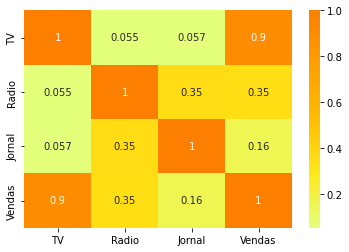

In [37]:
# Para uma melhor visualização, utilizaremos duas bibliotecas para criarmos gráficos de correlação
# O comando 'cmap' indica a paleta de cores a ser utilizada
# O comando 'annot' indica que os números devem aparecer no gráfico
sns.heatmap(df.corr(), cmap='Wistia', annot=True)
plt.show()

#### Interpretação do Heatmap
Após a criação do gráfico 'heatmap', é observada uma correlação de TV vs Vendas próxima de 1, ou seja, quanto mais é investido em anúncios de TV. Enquanto observamos um valor de 0.35 na correlação Rádio vs Vendas, o que mostra que não há uma correlação clara de investimentos e vendas de Rádio.

### Vamos agora para fase de criação de um modelo

O que precisamos identificar são:
- Os inputs do modelo (eixo X)
- Os outputs do modelo (eixo Y)

Lembrando que nosso objetivo é criar um modelo de previsão de vendas baseado nos dados de investimento nos diferentes canais (radio, jornais). Ou seja, nossos inputs são valor do investimento nos diferentes canais e nosso output será a venda prevista dado os inputs informados.
Vamos iniciar este bloco de código informando exatamente isso. Usaremos para essa etapa uma nova biblioteca. E como sempre, vamos precisar importá-las.

Após identificar os valores de X e Y, precisamos de dados para:
1. Treinar o modelo;
2. Testar o modelo.

Como temos 200 pontos não-nulos, de acordo com a Análise Exploratória, precisamos separar em dois grupos: uma quantidade para teste e outra quantidade para treino (é comum usarmos a proporção 75%/25%).

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [38]:
# A biblioteca sklearn possui diversos modelos de machine learning
# 'train_test_split' é utilizado para testes
# x -> recebe os valores de inputs (eixo X)
# df.drop('Vendas', axis=1) -> indica que todo o dataframe, com exceção da coluna 'Vendas', irá compor os valores de X
# y -> recebe os valores de outputs (eixo Y)
# df['Vendas'] -> recebe os valores que compõe o eixo Y
# x_train -> recebe os dados de treino X;
# x_test -> recebe os dados de teste X;
# y_train -> recebe os dados de treino Y;
# y_test -> recebe os dados de teste Y.
# test_size -> proporção de teste e treino, usamos 30%
# random_state -> valor de seed aleatório, ou seja, escolhe valores aleatórios do dataframe

from sklearn.model_selection import train_test_split
x = df.drop('Vendas', axis=1)
y = df['Vendas']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

#### Revisando o que foi feito até aqui

Sabemos que a última etapa pode não ser tão direta em um primeiro momento, mas vamos revisar o que fizemos até agora e pensar o que vamos fazer para frente:

1. Importamos a base de dados do arquivo.CSV para nosso programa;
2. Pensamos em dar uma limpeza nos dados, mas como tudo estava OK, passamos para a próxima etapa;
3. Analisamos graficamente nossa base e usamos o mapa de calor juntamente com o conceito de correlação para entendermos que existia sim uma relação de proporcionalidade entre os investimentos e as vendas;
4. Começamos a pensar no nosso modelo de previsão que se utilizará de inteligência artificial;
5. Para gerar uma inteligência artificial precisamos treiná la e testá la Como fazemos isso? Através de dados;
6. Criamos 4 variáveis (x_train x_test y_train y_test) com objetivo de fornecê las a nossa inteligência artificial;
7. Cá estamos! Usando nossa biblioteca vamos informar essas variáveis e iniciar o treinamento do nosso modelo Feito isso, testar esse modelo.

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [39]:
# Importar modelos da biblioteca SKLearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Treino da Inteligência Artificial
# Utiliza-se a função 'fit' para treinar o modelo
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [40]:
# Teste da Inteligência Artificial
# Comando 'predict' para fazer a predição com os valores de teste
test_pred_lin = lin_reg.predict(x_test)
test_pred_rf = rf_reg.predict(x_test)

# Teste R²
r2_lin = metrics.r2_score(y_test, test_pred_lin)
r2_rf = metrics.r2_score(y_test, test_pred_rf)
print(f'R² da Regressão Linear: {r2_lin}')
print(f'R² do Random Forest: {r2_rf}')

R² da Regressão Linear: 0.9071151423684274
R² do Random Forest: 0.9667038130961226


#### Conclusão dos modelos
Avaliando os valores de R², vemos que o modelo Random Forest possui um valor maior.

Obs.: R² varia entre 0 e 1.

#### Visualização Gráfica das Previsões

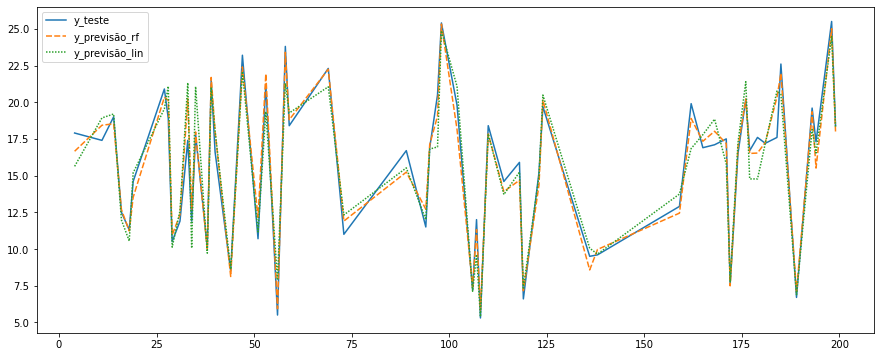

In [41]:
# Criação de um novo DataFrame com os resultados de teste
df_resultado = pd.DataFrame()
# df_resultado.index = x_test
df_resultado['y_teste'] = y_test
df_resultado['y_previsão_rf'] = test_pred_rf
df_resultado['y_previsão_lin'] = test_pred_lin

fig = plt.figure(figsize=(15,6))
sns.lineplot(data=df_resultado)
plt.show()

#### Como fazer uma nova previsão?

In [42]:
df_novos = pd.read_csv('novos.csv')
df_novos

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


Para fazer uma nova predição, criamos uma nova variável (pred_nova) onde ela recebe o valor de predição do novo _DataFrame_ e a variável do modelo escolhido.

_nova variável = variável do modelo escolhido + função predição + (novo DataFrame)_

pred_nova = lin_reg.predict(df_novos)

In [43]:
pred_nova = lin_reg.predict(df_novos)
print(pred_nova)

df_novos['Predição de Vendas'] = pred_nova
df_novos

[ 6.21773863  7.10231782 18.73172075]


,TV,Radio,Jornal,Predição de Vendas
0,23.1,3.8,69.2,6.217739
1,44.5,0.0,5.1,7.102318
2,170.2,45.9,0.0,18.731721


#### Verificando a importância das features

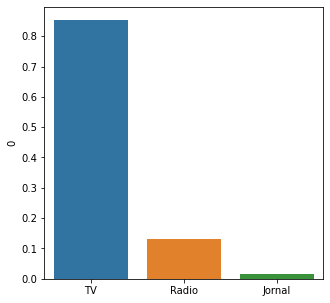

In [44]:
importancia_features = pd.DataFrame(rf_reg.feature_importances_, x_train.columns)
plt.figure(figsize=(5,5))
sns.barplot(x=importancia_features.index, y=importancia_features[0])
plt.show()

#### Conclusão a partir do gráfico de barras
Para o modelo Random Forest, verifica-se que:
- O investimento em TV é ~85% relevante;
- Rádio ~10%;
- Jornal menos que 5% relevante.